#Performing predictions with Linear Regression

Registering in the required libraries

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model,feature_selection,preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

##Simple Linear Regression

The following datasets contains the height and weight of a group of Men

In [7]:
sl_data = pd.read_csv('Mens_height_weight.csv')

Let's see the distribution of the height and weight

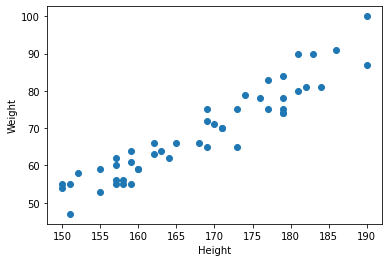

In [8]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data['Height'],sl_data['Weight'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


In [9]:
sl_data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


We'll apply linear regression with keeping Weight as the dependent variable and x as the independent variable

In [12]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(sl_data.Height[:,np.newaxis], sl_data.Weight)


print ('Intercept is ' + str(lm.intercept_) + '\n')

print ('Coefficient value of the height is ' + str(lm.coef_) + '\n')

pd.DataFrame(zip(sl_data.columns,lm.coef_), columns = ['features', 'estimatedCoefficients'])



Intercept is -99.2772096062735

Coefficient value of the height is [1.00092142]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


,features,estimatedCoefficients
0,Height,1.000921


Plotting the regression line on the previous scatter plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


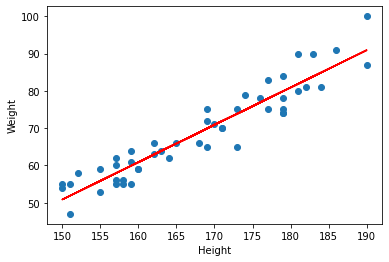

In [13]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data.Height,sl_data.Weight)
ax.plot(sl_data.Height,lm.predict(sl_data.Height[:, np.newaxis]), color = 'red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


##Multiple Regression

To understand multiple regression, we'll be using the NBA data. The following are the field descriptions

1. height = height in feet
2. weight = weight in pounds
3. success_field_goals = percent of successful field goals (out of 100 attempted)
4. success_free_throws = percent of successful free throws (out of 100 attempted)
5. avg_points_scored = average points scored per game

In [14]:
b_data = pd.read_csv('basketball.csv')

b_data.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [18]:
df_corr = b_data.corr().unstack()
df_corr = df_corr[df_corr<1]
df_corr.sort_values(ascending=False)
df_corr

height               weight                 0.834324
                     success_field_goals    0.495546
                     success_free_throws   -0.259271
                     avg_points_scored     -0.068906
weight               height                 0.834324
                     success_field_goals    0.516051
                     success_free_throws   -0.290159
                     avg_points_scored     -0.009844
success_field_goals  height                 0.495546
                     weight                 0.516051
                     success_free_throws   -0.018570
                     avg_points_scored      0.338760
success_free_throws  height                -0.259271
                     weight                -0.290159
                     success_field_goals   -0.018570
                     avg_points_scored      0.244852
avg_points_scored    height                -0.068906
                     weight                -0.009844
                     success_field_goals    0.

Here the average points scored is taken as the dependent variable. We'll see how is the distribution of each of the variable w.r.t the dependent variable

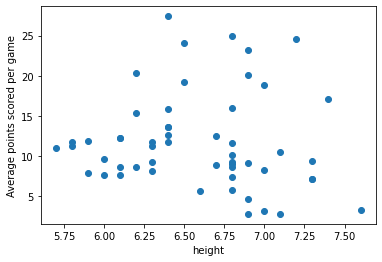

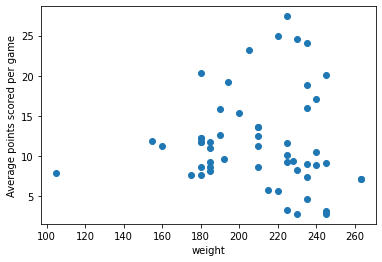

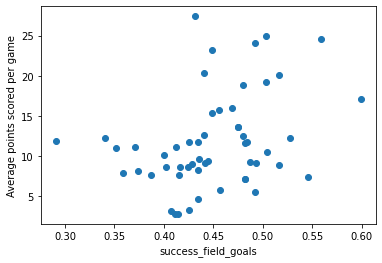

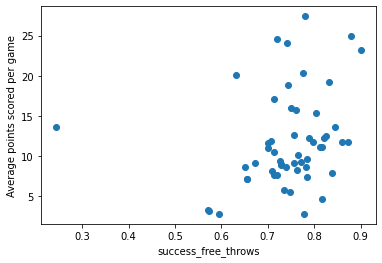

In [19]:
X_columns = b_data.columns[:-1]

for i in X_columns:
    fig, ax = plt.subplots(1, 1)  
    ax.scatter(b_data[i], b_data.avg_points_scored)
    ax.set_xlabel(i)
    ax.set_ylabel('Average points scored per game')
    plt.show()

Let's see how each of the variables are correlated with each other

In [20]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


Let's split the data into train and test where the train set will be used to build the data and the model will be applied to the test set.

In [22]:
X = b_data.values.copy() 
X_train, X_valid, y_train, y_valid = train_test_split( X[:, :-1], X[:, -1], train_size=0.80)

We'll generate a Linear Model with the given data 

In [25]:
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.363
Date:                Sun, 30 May 2021   Prob (F-statistic):             0.0703
Time:                        18:24:33   Log-Likelihood:                -135.10
No. Observations:                  43   AIC:                             280.2
Df Residuals:                      38   BIC:                             289.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3735     19.346      0.226      0.822     -34.791      43.538
x1            -3.1686      4.012     -0.790      0.435     -11.290       4.953
x2            -0.0074      0.058     -0.127      0.900      -0.125       0.110
x3            50.3908     18.487      2.726      0.010      12.965      87.816
x4            10.2003      9.134      1.117      0.271      -8.290      28.690
==============================================================================
Omnibus:                        4.034   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.622
Skew:                           0.707   Prob(JB):                        0.163
Kurtosis:                       2.854   Cond. No.                     4.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the 3rd variable is significant and the others aren't based on the pvalue. We'll recreate the model only using that variable.

In [26]:
result_alternate = sm.OLS( y_train, add_constant(X_train[:,2]) ).fit()
result_alternate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     5.073
Date:                Sun, 30 May 2021   Prob (F-statistic):             0.0297
Time:                        18:24:41   Log-Likelihood:                -137.36
No. Observations:                  43   AIC:                             278.7
Df Residuals:                      41   BIC:                             282.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9116      7.147     -0.547      0.587     -18.345      10.522
x1            35.4307     15.731      2.252      0.030       3.662      67.200
==============================================================================
Omnibus:                        4.138   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.668
Skew:                           0.714   Prob(JB):                        0.160
Kurtosis:                       2.901   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets predict on the test data and see how much is the error 

In [28]:
ypred = result.predict(add_constant(X_valid))
print (mse(ypred,y_valid))

ypred_alternate = result_alternate.predict(add_constant(X_valid[:, 2]))
print (mse(ypred_alternate,y_valid))


8.864621532917898
12.403083508792902


Lets see the actual vs predicted for the 1st model

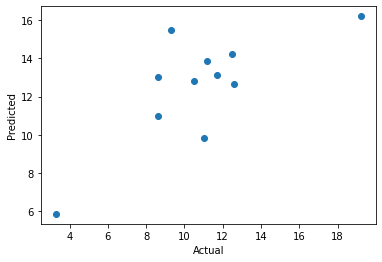

In [29]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Same plot for the 2nd plot

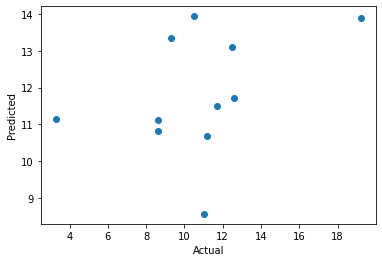

In [30]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

print ('Intercept is ' + str(lm.intercept_) + '\n')

pd.DataFrame(zip(b_data.columns,lm.coef_), columns = ['features', 'estimatedCoefficients'])

Intercept is 4.373512356168816



,features,estimatedCoefficients
0,height,-3.168571
1,weight,-0.007376
2,success_field_goals,50.390793
3,success_free_throws,10.200324


Lets see how is the R square

In [36]:
cross_val_score(lm, X_train, y_train, scoring='r2')

array([-8.64138790e+00,  8.28733094e-03, -1.52438220e+00,  4.97802786e-02,
       -1.86716269e-01])

Lets predict the on the test data

In [37]:
ypred = lm.predict(X_valid)

mean_squared_error(ypred,y_valid)

8.864621532917173

Plotting the predicted vs the actual

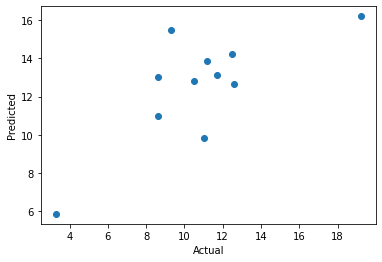

In [38]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()